In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 497.5 MB 18 kB/s 
     |████████████████████████████████| 462 kB 68.8 MB/s 


In [32]:
import tensorflow as tf

In [33]:
print(tf.__version__)

2.8.0


In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:12]
y = dataset.iloc[:, 12]

In [36]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0
9996,516,France,Male,35,10,57369.61,1,1,1
9997,709,France,Female,36,7,0.00,1,0,1
9998,772,Germany,Male,42,3,75075.31,2,1,0


In [37]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [39]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [40]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [41]:
X_train, X_test, y_train, y_test

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 7389          667   34       5       0.00              2          1   
 9275          427   42       1   75681.52              1          1   
 2995          535   29       2  112367.34              1          1   
 5316          654   40       5  105683.63              1          1   
 356           850   57       8  126776.30              2          1   
 ...           ...  ...     ...        ...            ...        ...   
 9225          594   32       4  120074.97              2          1   
 4859          794   22       4  114440.24              1          1   
 3264          738   35       5  161274.05              2          1   
 9845          590   38       9       0.00              2          1   
 2732          623   48       1  108076.33              1          1   
 
       IsActiveMember  Germany  Spain  Male  
 7389               0        0      1     0  
 9275               1        1      0     

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [43]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [44]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [45]:
# Part 2 - Now let's make the ANN!

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [51]:
# Initialising the ANN
classifier = Sequential()

In [52]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [53]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [54]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='linear'))

In [55]:
classifier.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

In [56]:
model_history=classifier.fit(X_train,y_train,validation_split=0.30,batch_size=10,epochs=200)

Epoch 1/200
560/560 [==============================] - 4s 5ms/step - loss: 13406387200.0000 - mse: 13406387200.0000 - mae: 100586.9062 - val_loss: 13175619584.0000 - val_mse: 13175619584.0000 - val_mae: 99078.1250
Epoch 2/200
560/560 [==============================] - 2s 4ms/step - loss: 13354075136.0000 - mse: 13354075136.0000 - mae: 100328.8672 - val_loss: 13074150400.0000 - val_mse: 13074150400.0000 - val_mae: 98564.1641
Epoch 3/200
560/560 [==============================] - 2s 4ms/step - loss: 13183131648.0000 - mse: 13183131648.0000 - mae: 99481.4609 - val_loss: 12832788480.0000 - val_mse: 12832788480.0000 - val_mae: 97351.8828
Epoch 4/200
560/560 [==============================] - 2s 4ms/step - loss: 12857486336.0000 - mse: 12857486336.0000 - mae: 97864.3984 - val_loss: 12430949376.0000 - val_mse: 12430949376.0000 - val_mae: 95333.4453
Epoch 5/200
560/560 [==============================] - 2s 4ms/step - loss: 12365009920.0000 - mse: 12365009920.0000 - mae: 95431.6094 - val_loss: 

In [57]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


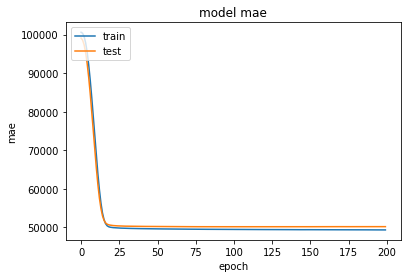

In [58]:

# summarize history for accuracy
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

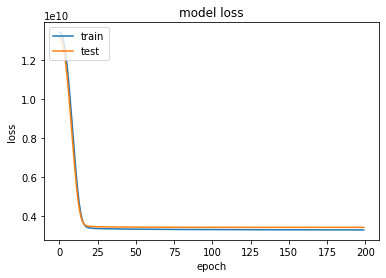

In [59]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# y_pred = (y_pred > 0.5)
y_pred

array([[105147.66 ],
       [102828.15 ],
       [103562.22 ],
       ...,
       [ 95113.805],
       [103375.79 ],
       [107879.695]], dtype=float32)

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

ValueError: ignored

In [62]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

ValueError: ignored

In [ ]:
score

0.846